In [85]:
from itertools import product 
import matplotlib.pyplot as plt
import numpy as np

#Functions

####Event detection Function 
The function iterates through the generic sample space and returns the set of outcomes where event_condition(outcome) is True.

In [86]:
def get_matching_event(event_condition, sample_space): 
  return set([outcome for outcome in sample_space if event_condition(outcome)])


####Computing event probabilites Function
The compute_probability function extracts the event associated with an inputted event condition to compute its probability.

In [87]:
def compute_probability(event_condition, generic_sample_space): 
  event = get_matching_event(event_condition, generic_sample_space) 
  return len(event) / len(generic_sample_space)


####Generalized event probability function 
The function takes as input a generic_sample_ space variable that can be either a weighted dictionary or an unweighted set.

In [88]:
def compute_event_probability(event_condition, generic_sample_space): 
  event = get_matching_event(event_condition, generic_sample_space) 
  if type(generic_sample_space) == type(set()): 
    return len(event) / len(generic_sample_space) 
  event_size = sum(generic_sample_space[outcome] for outcome in event) 
  return event_size / sum(generic_sample_space.values())



#Fair Coin Probability

Creating a sample space of coin flips

In [89]:
coin_sample_space = {'Heads', 'Tails'}

Creating a sample space of coin flips

In [90]:
prob_heads = 1 / len(coin_sample_space)
print(f'Probability of choosing heads is {prob_heads}')

Probability of choosing heads is 0.5


Defining event conditions

In [91]:
def is_heads_or_tails(outcome): return outcome in {'Heads', 'Tails'} 
def is_neither(outcome): return not is_heads_or_tails(outcome)
def is_heads(outcome): return outcome == 'Heads' 
def is_tails(outcome): return outcome == 'Tails'

Detecting events using event conditions

In [92]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither] 

for event_condition in event_conditions: 
  print(f"Event Condition: {event_condition.__name__}") 
  event = get_matching_event(event_condition, coin_sample_space) 
  print(f'Event: {event}\n') 

Event Condition: is_heads_or_tails
Event: {'Tails', 'Heads'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



In [93]:
for event_condition in event_conditions: 
  prob = compute_probability(event_condition, coin_sample_space) 
  name = event_condition.__name__ 
  print(f"Probability of event arising from '{name}' is {prob}")


Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


#Analyzing a biased coin

Representing a weighted sample space 

In [94]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}

Checking the weighted sample space size 

In [95]:
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

Checking the weighted event size

In [96]:
event = get_matching_event(is_heads_or_tails, weighted_sample_space) 
event_size = sum(weighted_sample_space[outcome] for outcome in event) 
assert event_size == 5


Computing weighted event probabilities

In [97]:
for event_condition in event_conditions: 
  prob = compute_event_probability(event_condition, weighted_sample_space) 
  name = event_condition.__name__ 
  print(f"Probability of event arising from '{name}' is {prob}")


Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


#Analyzing a family with four children

In [98]:
possible_children = ['Boy', 'Girl']
sample_space = set()


In [99]:
all_combinations = set(product(possible_children, repeat=4))
sample_space = all_combinations

In [100]:
sample_space

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

In [101]:
def has_two_boys(outcome):
  return len([child for child in outcome if child == 'Boy']) == 2

In [102]:
prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}")


Probability of 2 boys is 0.375


#Analyzing mulitple die rolls 

In [103]:
possible_rolls = list(range(1,7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


In [104]:
die_sample_space = set(product(possible_rolls, repeat=6))

In [105]:
def has_sum_of_21(outcome): return sum(outcome) == 21

In [106]:
prob = compute_event_probability(has_sum_of_21, die_sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


In [107]:
prob = compute_event_probability(lambda x: sum(x) == 21, die_sample_space)
assert prob == compute_event_probability(has_sum_of_21, die_sample_space)

#Computing die-roll probabilites using weighted sample spaces

In [108]:
from collections import defaultdict 
weighted_die_sample_space = defaultdict(int)
for outcome in die_sample_space:
  total = sum(outcome)
  weighted_die_sample_space[total] += 1

In [109]:
weighted_die_sample_space 

defaultdict(int,
            {6: 1,
             7: 6,
             8: 21,
             9: 56,
             10: 126,
             11: 252,
             12: 456,
             13: 756,
             14: 1161,
             15: 1666,
             16: 2247,
             17: 2856,
             18: 3431,
             19: 3906,
             20: 4221,
             21: 4332,
             22: 4221,
             23: 3906,
             24: 3431,
             25: 2856,
             26: 2247,
             27: 1666,
             28: 1161,
             29: 756,
             30: 456,
             31: 252,
             32: 126,
             33: 56,
             34: 21,
             35: 6,
             36: 1})

Checking a more common die-roll combination

In [110]:
num_combinations = weighted_die_sample_space[21] 
print(f"There are {num_combinations } ways for 6 die rolls to sum to 21")

There are 4332 ways for 6 die rolls to sum to 21


Comparing weighted events and regular events

In [111]:
event = get_matching_event(lambda x: sum(x) == 21, die_sample_space) 
assert weighted_die_sample_space[21] == len(event) 
assert sum(weighted_die_sample_space.values()) == len(die_sample_space)

Computing the weighted event probability of die rolls


In [112]:
prob = compute_event_probability(lambda x: x == 21, weighted_die_sample_space) 
assert prob == compute_event_probability(has_sum_of_21, die_sample_space) 
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


Comparing weighted to unweighted event space size

In [113]:
print('Number of Elements in Unweighted Sample Space:') 
print(len(die_sample_space)) 
print('Number of Elements in Weighted Sample Space:') 
print(len(weighted_die_sample_space))

Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


#Computing probabilites over interval ranges

In [114]:
#defining an interval function 
def is_in_interval(number, minimum, maximum):
  return minimum <= number <= maximum

Computing the probability over an interval

In [115]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_die_sample_space)
print(f"probability of interval is {prob}")

probability of interval is 0.5446244855967078


Computing the sample space for 10 coin flips

In [116]:
def generate_coin_sample_space(num_flips=10): 
  weighted_sample_space = defaultdict(int) 
  for coin_flips in product(['Heads', 'Tails'], repeat=num_flips): 
    heads_count = len([outcome for outcome in coin_flips if outcome == 'Heads']) 
    weighted_sample_space[heads_count] += 1 
  return weighted_sample_space 
  
weighted_sample_space = generate_coin_sample_space() 
assert weighted_sample_space[10] == 1 
assert weighted_sample_space[9] == 10

Computing an extreme head-count probability

In [117]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), weighted_sample_space) 
print(f"Probability of observing more than 7 heads is {prob}") 


Probability of observing more than 7 heads is 0.0546875


Computing an extreme interval probability

In [118]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space) 
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")

Probability of observing more than 7 heads or 7 tails is 0.109375


Analyzing extreme head counts for 20 fair coin flips

In [119]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20) 
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15), weighted_sample_space_20_flips) 
print(f"Probability of observing more than 15 heads or 15 tails is {prob}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


#Plotting Probabilites

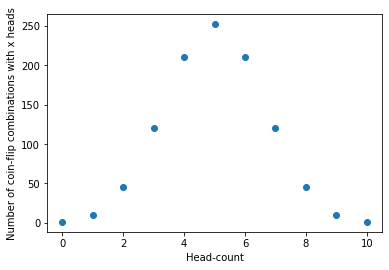

In [120]:
x_10_flips = list(weighted_sample_space.keys()) 
y_10_flips = [weighted_sample_space[key] for key in x_10_flips] 
plt.scatter(x_10_flips, y_10_flips) 
plt.xlabel('Head-count') 
plt.ylabel('Number of coin-flip combinations with x heads') 
plt.show()

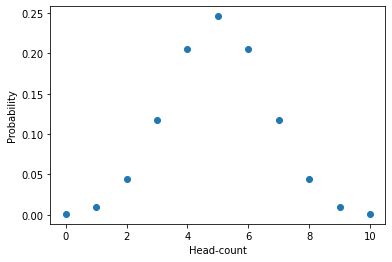

In [121]:
sample_space_size = sum(weighted_sample_space.values()) 
prob_x_10_flips = [value / sample_space_size for value in y_10_flips] 
plt.scatter(x_10_flips, prob_x_10_flips) 
plt.xlabel('Head-count') 
plt.ylabel('Probability') 
plt.show()

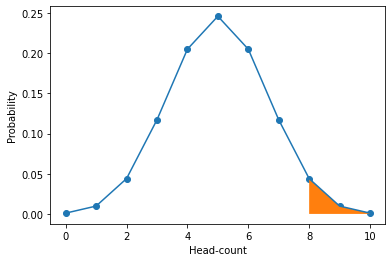

In [122]:
plt.plot(x_10_flips, prob_x_10_flips) 
plt.scatter(x_10_flips, prob_x_10_flips) 
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where) 
plt.xlabel('Head-count') 
plt.ylabel('Probability') 
plt.show()

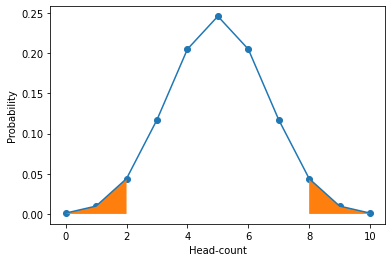

In [123]:
plt.plot(x_10_flips, prob_x_10_flips) 
plt.scatter(x_10_flips, prob_x_10_flips) 
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where) 
plt.xlabel('Head-count') 
plt.ylabel('Probability') 
plt.show()

Comparing multiple coin-flip probability distributions


In [124]:
# Computing probabilities for a 20-coin-flip distribution
x_20_flips = list(weighted_sample_space_20_flips.keys()) 
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips] 
sample_space_size = sum(weighted_sample_space_20_flips.values()) 
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

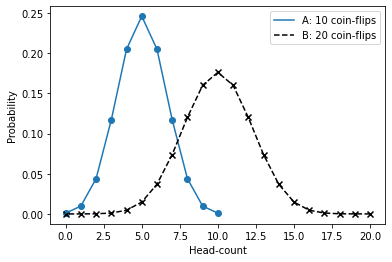

In [125]:
# Plotting two simultaneous distributions
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips') 
plt.scatter(x_10_flips, prob_x_10_flips) 
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--', label='B: 20 coin-flips') 
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x') 
plt.xlabel('Head-count') 
plt.ylabel('Probability') 
plt.legend() 
plt.show()

Highlighting intervals beneath two plotted distributions

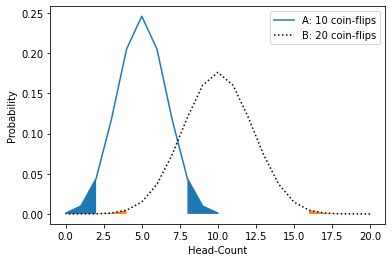

In [126]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips') 
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips') 
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips] 
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10) 
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips] 
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20) 
plt.xlabel('Head-Count') 
plt.ylabel('Probability') 
plt.legend() 
plt.show()

Converting head counts into frequencies

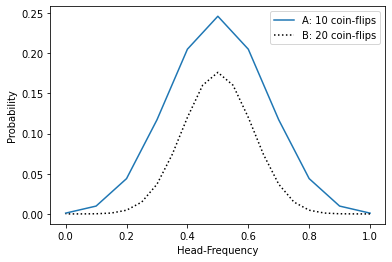

In [127]:
x_10_frequencies = [head_count /10 for head_count in x_10_flips] 
x_20_frequencies = [head_count /20 for head_count in x_20_flips] 
plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips') 
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips') 
plt.legend() 
plt.xlabel('Head-Frequency') 
plt.ylabel('Probability') 
plt.show()

Computing relative likelihoods of frequencies

In [128]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips] 
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

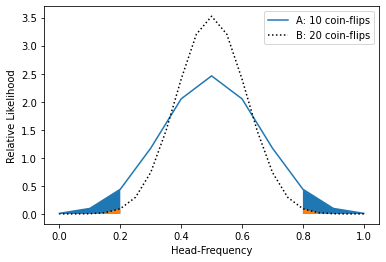

In [129]:
plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips') 
plt.plot(x_20_frequencies, relative_likelihood_20, color='k', linestyle=':', label='B: 20 coin-flips') 
plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10) 
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20) 
plt.legend() 
plt.xlabel('Head-Frequency') 
plt.ylabel('Relative Likelihood') 
plt.show()

# Random Simulations

Simulating 10 fair coin flips

In [130]:
np.random.seed(0) 
def frequency_heads(coin_flip_sequence): 
  total_heads = len([head for head in coin_flip_sequence if head == 1]) 
  return total_heads / len(coin_flip_sequence) 
  
coin_flips = [np.random.randint(0, 2) for _ in range(10)] 
freq_heads = frequency_heads(coin_flips) 
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


Plotting simulated fair coin-flip frequencies

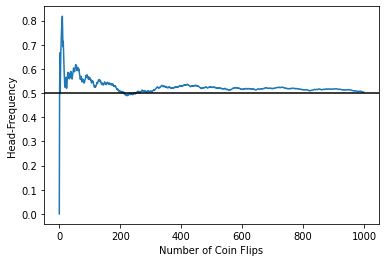

In [131]:
np.random.seed(0) 
coin_flips = [] 
frequencies = [] 
for _ in range(1000): 
  coin_flips.append(np.random.randint(0, 2)) 
  frequencies.append(frequency_heads(coin_flips)) 

plt.plot(list(range(1000)), frequencies) 
plt.axhline(0.5, color='k') 
plt.xlabel('Number of Coin Flips') 
plt.ylabel('Head-Frequency') 
plt.show()

Simulating biased coin flips

In [132]:
np.random.seed(0) 
print("Let's flip the biased coin once.") 
coin_flip = np.random.binomial(1, 0.7) 
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.") 
print("\nLet's flip the biased coin 10 times.") 
number_coin_flips = 10 
head_count = np.random.binomial(number_coin_flips, .7) 
print((f"{head_count} heads were observed out of " f"{number_coin_flips} biased coin flips"))

Let's flip the biased coin once.
Biased coin landed on heads.

Let's flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


Computing coin-flip-frequency convergence

(Page 37). 

In [133]:
np.random.seed(0) 
head_count = np.random.binomial(1000, 0.7) 
frequency = head_count / 1000 
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


In [134]:
np.random.seed(0) 
assert np.random.binomial(1000, 0.7) / 1000 == 0.697 
for i in range(1, 6): 
  head_count = np.random.binomial(1000, 0.7) 
  frequency = head_count / 1000 
  print(f"Frequency at iteration {i} is {frequency}") 
  if frequency == 0.7: 
    print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


Computing confidence intervals using histograms and NumPy arrays 

In [135]:
np.random.seed(0) 
head_count_array = np.random.binomial(1000, 0.7, 500)
frequency_array = head_count_array / 1000

In [136]:
frequency_array[:20]

array([0.697, 0.69 , 0.7  , 0.707, 0.702, 0.699, 0.723, 0.67 , 0.702,
       0.713, 0.721, 0.689, 0.711, 0.697, 0.717, 0.691, 0.731, 0.697,
       0.722, 0.728])

Finding the largest and smallest frequency values

In [137]:
min_freq = frequency_array.min() 
max_freq = frequency_array.max() 
print(f"Minimum frequency observed: {min_freq}") 
print(f"Maximum frequency observed: {max_freq}") 
print(f"Difference across frequency range: {max_freq - min_freq}")


Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


Plotting a frequency histogram using plt.hist

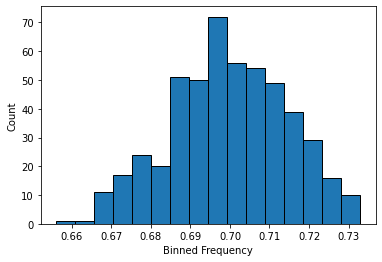

In [138]:
plt.hist(frequency_array, bins='auto', edgecolor='black') 
plt.xlabel('Binned Frequency') 
plt.ylabel('Count') 
plt.show()

Number of Bins: 16
Bin width: 0.004812499999999997


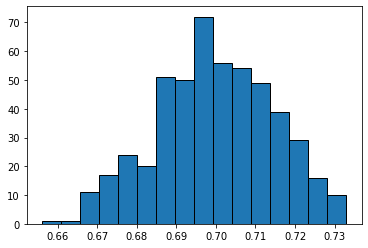

In [139]:
#counting bins in a plotted histogram
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black') 
print(f"Number of Bins: {counts.size}")

bin_width = bin_edges[1] - bin_edges[0] 
print(f"Bin width: {bin_width}")

In [140]:
#Getting a bin's frequency and size
def output_bin_coverage(i): 
  count = int(counts[i]) 
  range_start, range_end = bin_edges[i], bin_edges[i+1] 
  range_string = f"{range_start} - {range_end}" 
  print((f"The bin for frequency range {range_string} contains " f"{count} element{'' if count == 1 else 's'}"))


output_bin_coverage(0)
output_bin_coverage(5)
output_bin_coverage(counts.argmax())

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements
The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


Plotting a histogram’s relative likelihoods

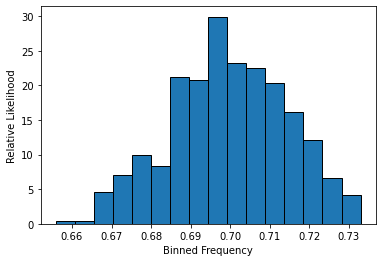

In [141]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True) 
plt.xlabel('Binned Frequency') 
plt.ylabel('Relative Likelihood') 
plt.show()

In [142]:
likelihoods.sum() * bin_width

1.0

In [143]:
# Plotting a histogram’s relative likelihoods

index = likelihoods.argmax() 
area = likelihoods[index] * bin_width 
range_start, range_end = bin_edges[index], bin_edges[index+1] 
range_string = f"{range_start} - {range_end}" 
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [144]:
# Increasing the probability of a frequency range 
peak_index = likelihoods.argmax() 
start_index, end_index = (peak_index - 1, peak_index + 2) 
area = likelihoods[start_index: end_index + 1].sum() * bin_width 
range_start, range_end = bin_edges[start_index], bin_edges[end_index] 
range_string = f"{range_start} - {range_end}" 
print(f"Sampled frequency falls within interval {range_string} with probability {area}") 

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


Computing a high confidence interval

In [145]:
def compute_high_confidence_interval(likelihoods, bin_width): 
  peak_index = likelihoods.argmax() 
  area = likelihoods[peak_index] * bin_width 
  start_index, end_index = peak_index, peak_index + 1 
  while area < 0.95: 
    if start_index > 0: 
      start_index -= 1 
    if end_index < likelihoods.size - 1: 
      end_index += 1 
        
    area = likelihoods[start_index: end_index + 1].sum() * bin_width 
  
  range_start, range_end = bin_edges[start_index], bin_edges[end_index] 
  range_string = f"{range_start:.6f} - {range_end:.6f}" 
  print((f"The frequency range {range_string} represents a " f"{100 * area:.2f}% confidence interval")) 
  return start_index, end_index 
        
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

Shrinking the range of a high confidence interval

In [146]:
np.random.seed(0) 
head_count_array = np.random.binomial(1000, 0.7, 100000) 
frequency_array = head_count_array / 1000

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


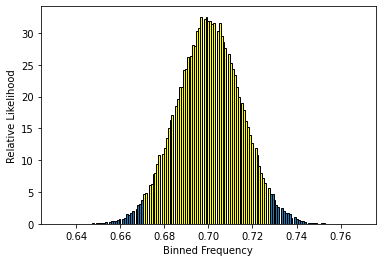

In [147]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', 
                                           edgecolor='black', density=True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
  patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency') 
plt.ylabel('Relative Likelihood') 
plt.show()




Sampling 5 billion flipped coins

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


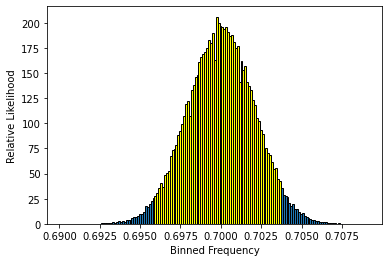

In [148]:
np.random.seed(0) 
head_count_array = np.random.binomial(50000, 0.7, 100000) 
frequency_array = head_count_array / 50000 
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True) 
bin_width = bin_edges[1] - bin_edges[0] 
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width) 
for i in range(start_index, end_index): 
  patches[i].set_facecolor('yellow') 
plt.xlabel('Binned Frequency') 
plt.ylabel('Relative Likelihood') 
plt.show()

Computing a histogram using np.histogram and excluding the visual

In [149]:
np.random.seed(0) 
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True) 
bin_width = bin_edges[1] - bin_edges[0] 
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(47, 114)

Predicting red cards in a shuffled deck

Modeling a 52-card deck

In [150]:
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards 

Shuffling a 52-card deck

In [162]:
np.random.seed(1)
shuffled_deck = np.random.permutation(unshuffled_deck)

Coding a card game strategy

In [163]:
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
  remaining_red_cards -= card
  remaining_total_cards = 52 - i - 1
  if remaining_red_cards / remaining_total_cards > 0.5:
    break 

print(f"Stopping the game at index {i}.") 
final_card = shuffled_deck[i + 1] 
color = 'red' if final_card else 0 
print(f"The next card in the deck is {'red' if final_card else 'black'}.") 
print(f"We have {'won' if final_card else 'lost'}!")


Stopping the game at index 0.
The next card in the deck is red.
We have won!


Generalizing the card game strategy

In [164]:
np.random.seed(0) 
total_cards = 52 
total_red_cards = 26 
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None, return_index=False): 
  if shuffled_deck is None: 
    shuffled_deck = np.random.permutation(unshuffled_deck) 
  remaining_red_cards = total_red_cards 
  for i, card in enumerate(shuffled_deck[:-1]): 
    remaining_red_cards -= card 
    fraction_red_cards = remaining_red_cards / (total_cards - i - 1) 
    if fraction_red_cards > min_fraction_red: 
      break 
  return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1] 

Running the strategy over 1,000 shuffles

In [165]:
observations = np.array([execute_strategy() for _ in range(1000)])

Computing the frequency of wins

In [166]:
frequency_wins = observations.sum() / 1000 
assert frequency_wins == observations.mean() 
print(f"The frequency of wins is {frequency_wins}")


The frequency of wins is 0.511


Computing total profit

In [167]:
dollars_won = frequency_wins * 1000 
dollars_lost = (1 - frequency_wins) * 1000 
total_profit = dollars_won - dollars_lost 
print(f"Total profit is ${total_profit:.2f}")

Total profit is $22.00


Plotting simulated frequencies of wins

In [168]:
np.random.seed(0) 
def repeat_game(number_repeats): 
  observations = np.array([execute_strategy() for _ in range(number_repeats)]) 
  return observations.mean() 

frequencies = [] 
for i in range(1, 1000): 
  frequencies.append(repeat_game(i))

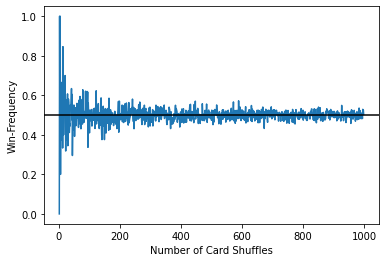

The win-frequency for 10,000 shuffles is 0.5035035035035035


In [169]:
plt.plot(list(range(1, 1000)), frequencies) 
plt.axhline(0.5, color='k') 
plt.xlabel('Number of Card Shuffles') 
plt.ylabel('Win-Frequency') 
plt.show() 
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")

Computing the confidence interval for 3 million shuffles

The frequency range 0.488938 - 0.509494 represents a 97.00% confidence interval


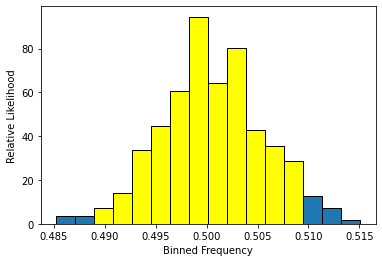

In [171]:
np.random.seed(0) 
frequency_array = np.array([repeat_game(10000) for _ in range(300)]) 

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', 
                                           edgecolor='black', density=True) 
bin_width = bin_edges[1] - bin_edges[0]

start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width) 
for i in range(start_index, end_index): 
  patches[i].set_facecolor('yellow') 
plt.xlabel('Binned Frequency') 
plt.ylabel('Relative Likelihood') 
plt.show() 

Computing the confidence interval for 150 million shuffles

In [ ]:
np.random.seed(0) 
frequency_array = np.array([repeat_game(50000) for _ in range(3000)]) 

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True) 
bin_width = bin_edges[1] - bin_edges[0] 
compute_high_confidence_interval(likelihoods, bin_width)

Optimizing strategies using the sample space for a 10-card deck

In [173]:
import itertools
total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards 
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.5


Applying multiple strategies to a 10-card deck

In [174]:
def scan_strategies(): 
  fractions = [value / 100 for value in range(50, 100)] 
  probabilities = [] 
  for frac in fractions: 
    win_condition = lambda x: execute_strategy(frac, shuffled_deck=np.array(x)) 
    probabilities.append(compute_event_probability(win_condition, sample_space)) 
    return probabilities 
probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}") 
print(f"Highest probability of win is {max(probabilities)}")



Lowest probability of win is 0.5
Highest probability of win is 0.5


Applying multiple strategies to multiple decks

In [175]:
for total_cards in [2, 4, 6, 8]: 
  total_red_cards = int(total_cards / 2) 
  total_black_cards = total_red_cards 
  unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards 
  sample_space = set(itertools.permutations(unshuffled_deck)) 
  
  probabilities = scan_strategies() 
  if all(prob == 0.5 for prob in probabilities): 
    print(f"No winning strategy found for deck of size {total_cards}") 
  else: 
    print(f"Winning strategy found for deck of size {total_cards}")

No winning strategy found for deck of size 2
No winning strategy found for deck of size 4
No winning strategy found for deck of size 6
No winning strategy found for deck of size 8


Plotting strategy outcomes across a 52-card deck

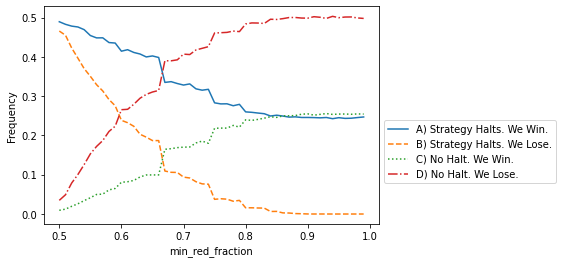

In [176]:
np.random.seed(0)
total_cards = 52 
total_red_cards = 26 
unshuffled_deck = red_cards + black_cards 
def repeat_game_detailed(number_repeats, min_red_fraction): 
  observations = [execute_strategy(min_red_fraction, return_index=True) for _ in range(num_repeats)] 
  
  successes = [index for index, card, in observations if card == 1] 
  halt_success = len([index for index in successes if index != 51]) 
  no_halt_success = len(successes) - halt_success 
  failures = [index for index, card, in observations if card == 0] 
  halt_failure = len([index for index in failures if index != 51]) 
  no_halt_failure = len(failures) - halt_failure 
  result = [halt_success, halt_failure, no_halt_success, no_halt_failure] 
  return [r / number_repeats for r in result] 

fractions = [value / 100 for value in range(50, 100)] 
num_repeats = 50000 
result_types = [[], [], [], []] 
for fraction in fractions: 
  result = repeat_game_detailed(num_repeats, fraction) 
  for i in range(4): 
    result_types[i].append(result[i]) 
plt.plot(fractions, result_types[0], label='A) Strategy Halts. We Win.') 
plt.plot(fractions, result_types[1], linestyle='--', label='B) Strategy Halts. We Lose.') 
plt.plot(fractions, result_types[2], linestyle=':', label='C) No Halt. We Win.') 
plt.plot(fractions, result_types[3], linestyle='-.', label='D) No Halt. We Lose.') 
plt.xlabel('min_red_fraction') 
plt.ylabel('Frequency') 
plt.legend(bbox_to_anchor=(1.0, 0.5)) 
plt.show()
